# Pair Correlation or Radial Distribution Function

In [7]:
import numpy as np 
import freud 
import glob
import gsd, gsd.hoomd
import matplotlib 
import matplotlib.pyplot as plt 

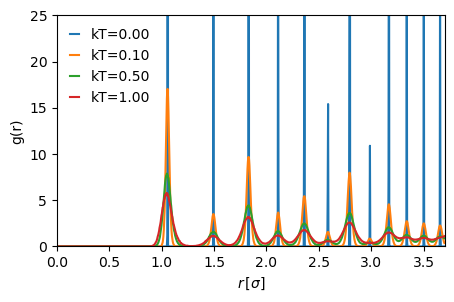

In [43]:
fig, ax = plt.subplots(figsize=(5,3))

kT = ['0.00','0.10','0.50','1.00']
for T in kT: 
    file = 'fcc/run_fcc_1.20_%s.gsd'%T
    trajectory = gsd.hoomd.open(file,mode='r') 
    rdf = freud.density.RDF(bins=1000, r_max=3.7)
    for frame in trajectory:
        points=frame.particles.position
        box = frame.configuration.box
        rdf.compute(system=(box, points), reset=False)
    ax.plot(rdf.bin_centers, rdf.rdf,label='kT=%s'%T)
ax.set_xlabel('$r\, [\sigma]$')
ax.set_ylabel('g(r)')
ax.set_ylim([0,25])
ax.set_xlim([0,3.7])
ax.legend(frameon=False,loc='upper left',handlelength=0.7)
plt.show()

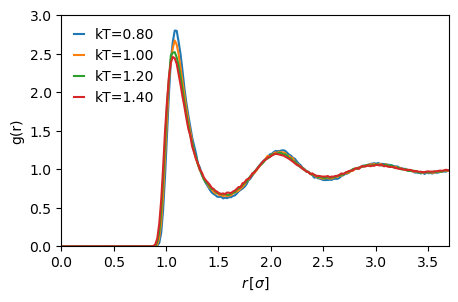

In [53]:
fig, ax = plt.subplots(figsize=(5,3))

kT = ['0.80','1.00','1.20','1.40']
for T in kT: 
    file = 'liquid/run_liquid_0.80_%s.gsd'%T
    trajectory = gsd.hoomd.open(file,mode='r') 
    rdf = freud.density.RDF(bins=200, r_max=3.7)
    for frame in trajectory:
        points=frame.particles.position
        box = frame.configuration.box
        rdf.compute(system=(box, points), reset=False)
    ax.plot(rdf.bin_centers, rdf.rdf,label='kT=%s'%T)
ax.set_xlabel('$r\, [\sigma]$')
ax.set_ylabel('g(r)')
ax.set_ylim([0,3])
ax.set_xlim([0,3.7])
ax.legend(frameon=False,loc='upper left',handlelength=0.7)
plt.show()

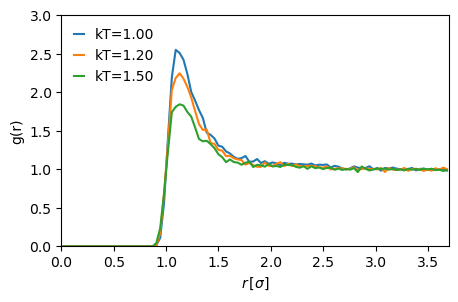

In [57]:
fig, ax = plt.subplots(figsize=(5,3))

kT = ['1.00','1.20','1.50']
for T in kT: 
    file = 'gas/run_gas_0.05_%s.gsd'%T
    trajectory = gsd.hoomd.open(file,mode='r') 
    rdf = freud.density.RDF(bins=100, r_max=3.7)
    for frame in trajectory:
        points=frame.particles.position
        box = frame.configuration.box
        rdf.compute(system=(box, points), reset=False)
    ax.plot(rdf.bin_centers, rdf.rdf,label='kT=%s'%T)
ax.set_xlabel('$r\, [\sigma]$')
ax.set_ylabel('g(r)')
ax.set_ylim([0,3])
ax.set_xlim([0,3.7])
ax.legend(frameon=False,loc='upper left',handlelength=0.7)
plt.show()

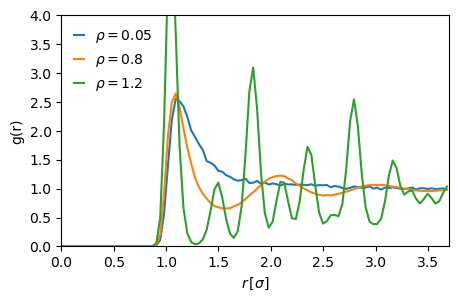

In [70]:
fig, ax = plt.subplots(figsize=(5,3))

files = ['gas/run_gas_0.05_1.00.gsd','liquid/run_liquid_0.80_1.00.gsd','fcc/run_fcc_1.20_1.00.gsd']
rho = ['0.05','0.8','1.2']
for i,file in enumerate(files): 
    trajectory = gsd.hoomd.open(file,mode='r') 
    rdf = freud.density.RDF(bins=100, r_max=3.7)
    for frame in trajectory:
        points=frame.particles.position
        box = frame.configuration.box
        rdf.compute(system=(box, points), reset=False)
    ax.plot(rdf.bin_centers, rdf.rdf,label=r'$\rho=%s$'%rho[i])
ax.set_xlabel('$r\, [\sigma]$')
ax.set_ylabel('g(r)')
ax.set_ylim([0,4])
ax.set_xlim([0,3.7])
ax.legend(frameon=False,loc='upper left',handlelength=0.7)
plt.show()

# Structure Factor as Fourier Transform from Radial Distribution Function

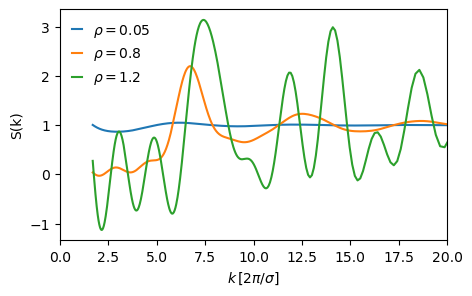

In [77]:
from scipy.fftpack import fft, ifft
import pylab as pl 
from pylab import sin 

def FT(r, f,density):
    K=2.0*pl.pi/r
    dr=r[1:]-r[:-1]
    f=f[:-1]
    r=r[:-1]
    ft=pl.zeros(len(r-1))
    for i in range(len(r-1)):
        k=K[i]
        ft[i]=4*density*np.pi*((f-1)*r**2*(sin(k*r)/(k*r))*dr).sum()+1
    return K,ft

fig, ax = plt.subplots(figsize=(5,3))

files = ['gas/run_gas_0.05_1.00.gsd','liquid/run_liquid_0.80_1.00.gsd','fcc/run_fcc_1.20_1.00.gsd']
rho = ['0.05','0.8','1.2']
for i,file in enumerate(files): 
    trajectory = gsd.hoomd.open(file,mode='r') 
    rdf = freud.density.RDF(bins=1000, r_max=3.7)
    for frame in trajectory:
        points=frame.particles.position
        box = frame.configuration.box
        rdf.compute(system=(box, points), reset=False)
    K,FFh=FT(rdf.bin_centers,rdf.rdf,float(rho[i]))
    ax.plot(K[:-1],FFh,label=r'$\rho=%s$'%rho[i])
ax.set_xlabel('$k\, [2\pi/\sigma]$')
ax.set_ylabel('S(k)')
#ax.set_ylim([0,4])
ax.set_xlim([0,20])
ax.legend(frameon=False,loc='upper left',handlelength=0.7)
plt.show()